In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import make_circles

In [10]:
n_samples = 1000

X,y = make_circles(n_samples, noise=0.04, random_state=49)

In [11]:
X.shape

(1000, 2)

In [12]:
y

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [13]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,-0.676958,-0.751480,0
1,-0.734037,-0.420524,1
2,-0.764956,0.284312,1
3,1.037655,-0.017063,0
4,-0.642720,0.745202,0


In [14]:
circles.label.value_counts()

0    500
1    500
Name: label, dtype: int64

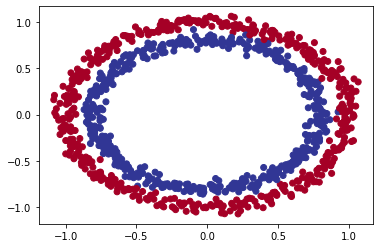

In [15]:
import matplotlib.pyplot as plt

plt.scatter(circles.X0,circles.X1,c=y,cmap=plt.cm.RdYlBu)

In [16]:
X.shape, y.shape

((1000, 2), (1000,))

In [24]:
tf.random.set_seed(49)

model_1= tf.keras.Sequential([ 
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
model_1.fit(X,y,epochs=50, verbose=0)

In [30]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474822998047, 0.5]

In [31]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


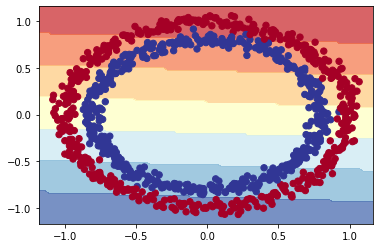

In [32]:
plot_decision_boundary(model_1,X,y)

In [38]:
tf.random.set_seed(49)

model_2= tf.keras.Sequential([ 
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
model_2.fit(X,y,epochs=50, verbose=0)

model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474822998047, 0.5]

doing binary classifcation...


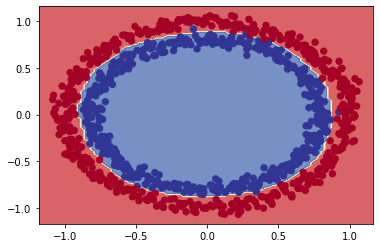

In [35]:
plot_decision_boundary(model_2,X,y)

In [39]:
tf.random.set_seed(49)

model_3= tf.keras.Sequential([ 
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history3=model_3.fit(X,y,epochs=100, verbose=0, 
                    callbacks=[lr_scheduler])

model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.8875 - accuracy: 0.5000


[0.887471079826355, 0.5]

<AxesSubplot:>

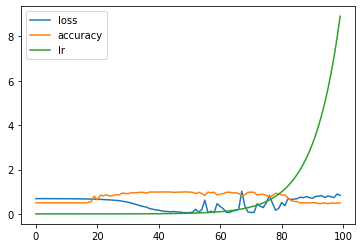

In [41]:
pd.DataFrame(history3.history).plot()

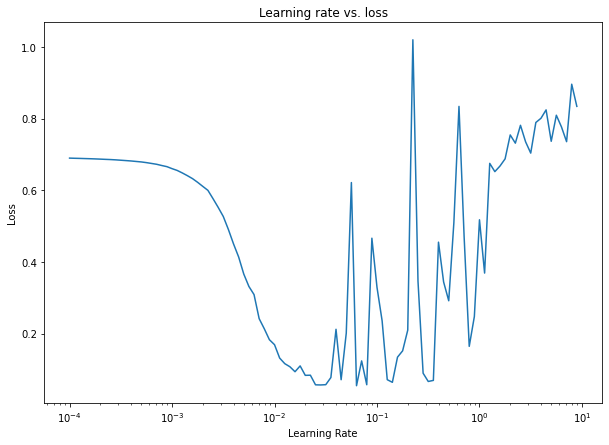

In [43]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history3.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [46]:
tf.random.set_seed(49)

model_4= tf.keras.Sequential([ 
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.15), 
    metrics=['accuracy']
)


history4=model_4.fit(X,y,epochs=100, verbose=0)

model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9830


[0.04992355406284332, 0.9829999804496765]

In [50]:
h4=pd.DataFrame(history4.history)

In [51]:
h4.head()

,loss,accuracy
0,0.631817,0.633
1,0.486556,0.765
2,0.301522,0.891
3,0.105146,0.986
4,0.097553,0.972


In [52]:
history4.history['loss']

[0.631816565990448,
 0.4865560233592987,
 0.30152150988578796,
 0.105145663022995,
 0.0975530743598938,
 0.14381350576877594,
 0.08720748126506805,
 0.08169342577457428,
 0.061222728341817856,
 0.054940082132816315,
 0.05553275719285011,
 0.09443867206573486,
 0.15642708539962769,
 0.050699543207883835,
 0.06306348741054535,
 0.09242241829633713,
 0.08682406693696976,
 0.059376273304224014,
 0.08750686049461365,
 0.037650708109140396,
 0.09738514572381973,
 0.12658502161502838,
 0.26774147152900696,
 0.19130931794643402,
 0.1994953751564026,
 0.22510233521461487,
 0.26584550738334656,
 0.06808099150657654,
 0.03464749455451965,
 0.052083175629377365,
 0.18379412591457367,
 0.3023349940776825,
 0.050939567387104034,
 0.06959281861782074,
 0.0513000413775444,
 0.10404101014137268,
 0.10389271378517151,
 0.030122166499495506,
 0.03238844498991966,
 0.056761886924505234,
 0.06244487687945366,
 0.0472739115357399,
 0.03249387815594673,
 0.029307600110769272,
 0.05961105227470398,
 0.0674713

In [67]:
n=np.array(range(0,13))

n%10, (21-n)%10,  (13+n)%10

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2], dtype=int32),
 array([1, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 9], dtype=int32),
 array([3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5], dtype=int32))